In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
x1 = [0, -1, -2, -1, 1/2, 1, 1, 3/2]
x2 = [-1, -1/2, -1, -3/2, 1, 2, 0, 1]

X = np.array([x1, x2]).T
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

In [9]:
df = pd.DataFrame(X, columns=['x1', 'x2'])

In [10]:
df['y'] = y

In [11]:
df

,x1,x2,y
0,0.0,-1.0,0
1,-1.0,-0.5,0
2,-2.0,-1.0,0
3,-1.0,-1.5,0
4,0.5,1.0,1
5,1.0,2.0,1
6,1.0,0.0,1
7,1.5,1.0,1


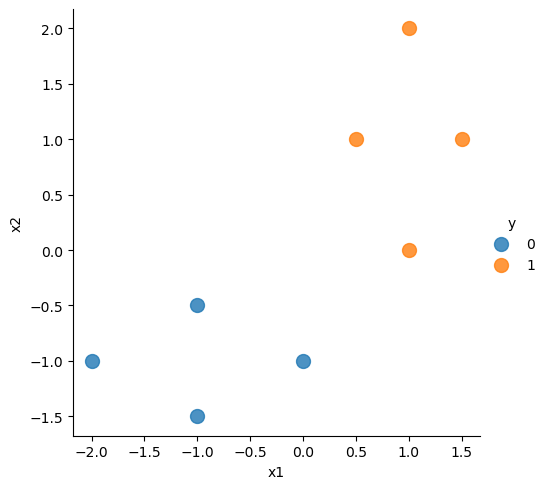

In [12]:
sns.lmplot(x='x1', y='x2', data=df, hue='y', fit_reg=False, scatter_kws={"s": 100})
plt.show()

In [13]:
# Calculate the means of the two classes
mean_0 = np.mean(X[y==0], axis=0)
mean_1 = np.mean(X[y==1], axis=0)

In [14]:
mean_0, mean_1

(array([-1., -1.]), array([1., 1.]))

In [15]:
# Calculate the pi0, pi1
pi0 = np.sum(y==0) / len(y)
pi1 = np.sum(y==1) / len(y)

In [16]:
pi0, pi1

(0.5, 0.5)

In [19]:
# Calculate the covariance matrix
cov_0 = np.zeros((2, 2))
cov_1 = np.zeros((2, 2))

for i in range(len(y)):
    if y[i] == 0:
        cov_0 += np.outer(X[i] - mean_0, X[i] - mean_0)
    else:
        cov_1 += np.outer(X[i] - mean_1, X[i] - mean_1)

cov_0 /= np.sum(y==0)
cov_1 /= np.sum(y==1)

In [20]:
cov_0

array([[0.5  , 0.   ],
       [0.   , 0.125]])

In [21]:
cov_1

array([[0.125, 0.   ],
       [0.   , 0.5  ]])

In [22]:
# calculate the covariance matrix general
cov = (pi0 * cov_0 + pi1 * cov_1)/len(y)

In [23]:
cov

array([[0.0390625, 0.       ],
       [0.       , 0.0390625]])

In [24]:
# Calculate the inverse of the covariance matrix
cov_inv = np.linalg.inv(cov)

In [26]:
# Calculate the weights
w = np.dot(cov_inv, (mean_0 - mean_1))
# Calculate the bias
b = -0.5 * np.dot(np.dot(mean_0.T, cov_inv), mean_0) + 0.5 * np.dot(np.dot(mean_1.T, cov_inv), mean_1) + np.log(pi0/pi1)

In [27]:
w, b

(array([-51.2, -51.2]), 0.0)

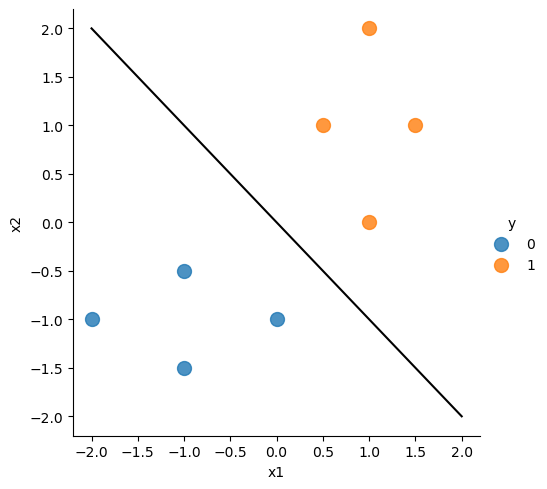

In [34]:
# Calculate the decision boundary
x1 = np.linspace(-2, 2, 100)
x2 = -(w[0] * x1 + b) / w[1]

# Plot the decision boundary
sns.lmplot(x='x1', y='x2', data=df, hue='y', fit_reg=False, scatter_kws={"s": 100})
plt.plot(x1, x2, color='black')
plt.show()

In [37]:
# Predict the class of x = [1/2, 1/2]
x = np.array([1/2, 1/2])
y_pred = np.dot(x, w) + b
print('Probability of x = [1/2, 1/2] is: ', 1/(1 + np.exp(-y_pred)))
if y_pred > 0:
    print('Class 1')
else:
    print('Class 0')

Probability of x = [1/2, 1/2] is:  5.809282904332702e-23
Class 0


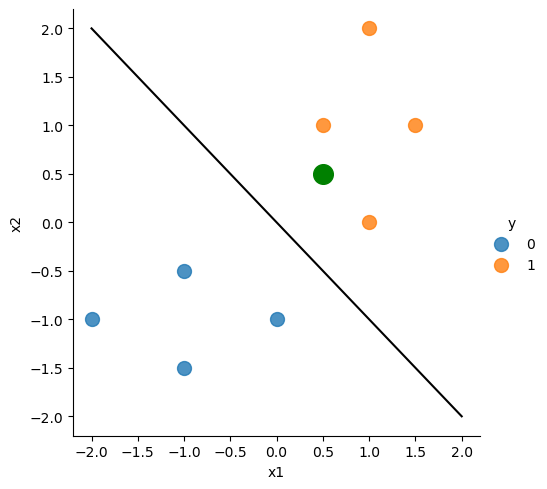

In [38]:
sns.lmplot(x='x1', y='x2', data=df, hue='y', fit_reg=False, scatter_kws={"s": 100})
plt.plot(x1, x2, color='black')
plt.scatter(x[0], x[1], color='green', s=200)
plt.show()

In [39]:
# With mu_0 = [-1, -1, -1], mu_1 = [1, 1, 1], pi0 = 0.5, pi1 = 0.5
mu_0 = np.array([-1, -1, -1])
mu_1 = np.array([1, 1, 1])
pi0 = 0.5
pi1 = 0.5
sigma = np.array([[2, 1, 1], [1, 1, 2], [1, 2, 2]])

# Calculate the weights
w = np.dot(np.linalg.inv(sigma), (mu_0 - mu_1))

# Calculate the bias
b = -0.5 * np.dot(np.dot(mu_0.T, np.linalg.inv(sigma)), mu_0) + 0.5 * np.dot(np.dot(mu_1.T, np.linalg.inv(sigma)), mu_1) + np.log(pi0/pi1)

In [40]:
w, b

(array([-0.66666667,  0.        , -0.66666667]), 0.0)

In [42]:
# Predict the class of x_test
x_test = np.array([1, 0, 0])
y_pred = np.dot(x_test, w) + b
print('Probability of x_test is: ', 1/(1 + np.exp(-y_pred)))
if y_pred > 0:
    print('Class 1')
else:
    print('Class 0')

Probability of x_test is:  0.33924363123418283
Class 0
